### White noise proportional to the value magnitude

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = torch.randint(0, 20, (100, 1)).double()
b = torch.normal(torch.zeros(a.shape), torch.sqrt(a)/20.)

c0 = a.numpy()
c = (a + b).numpy()

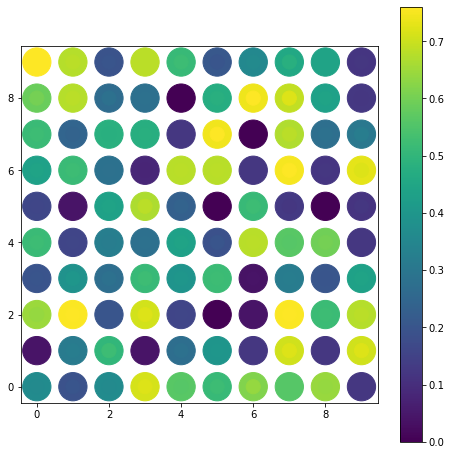

In [7]:
%matplotlib inline

dat = np.meshgrid(np.arange(0, 10, 1), np.arange(0, 10, 1))
dat = np.array(dat)
dat = dat.reshape(2, 100).T

plt.scatter(dat[:, 0], dat[:, 1], c=c/25., s=800)
plt.scatter(dat[:, 0], dat[:, 1], c=c0/25., s=200)
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches((8, 8))
plt.colorbar()

### Pooling illustration

In [27]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
%matplotlib inline

In [28]:
dat0 = np.random.uniform(0, 10, (4,4))
# print(dat0)
# print(dat0[::2, ::2])
# print(dat0[1::2, 1::2])
# print(dat0[1::2, ::2])

In [29]:
dat = np.random.uniform(0, 10, (10,10))
pooler = torch.nn.MaxPool2d(kernel_size=2, stride=2)
dat2 = pooler(torch.tensor(dat).unsqueeze(0).unsqueeze(0))
dat_pooled = dat2.squeeze().detach().numpy()

In [30]:

dat_pooled_prop = np.zeros(dat.shape)
dat_pooled_prop[::2, ::2] = dat_pooled[:]
dat_pooled_prop[::2, 1::2] = dat_pooled[:]
dat_pooled_prop[1::2, ::2] = dat_pooled[:]
dat_pooled_prop[1::2, 1::2] = dat_pooled[:]

In [31]:
fig = make_subplots(1, 3, horizontal_spacing=0.05)
fig.add_trace(go.Heatmap(z=dat, coloraxis='coloraxis'), 1, 1)
fig.add_trace(go.Heatmap(z=dat_pooled, coloraxis='coloraxis'), 1, 2)
fig.add_trace(go.Heatmap(z=dat_pooled_prop, coloraxis='coloraxis'), 1, 3)
fig.update_layout(
    {
        "coloraxis_cmin": 0,
        "coloraxis_cmax": 10,
        'width':900, 'height':400, 'autosize':True
    }
)
fig.show()

tensor([0.5000, 2.5000, 4.5000, 6.5000, 8.5000])


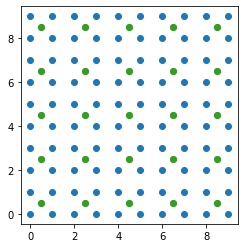

In [32]:
dat = np.meshgrid(np.arange(0, 10, 1), np.arange(0, 10, 1))
dat = np.array(dat)
dat = dat.reshape(2, 100).T

dat2 = np.meshgrid(np.arange(0.5, 10, 2), np.arange(0.5, 10, 2))
dat2 = np.array(dat2)
dat2 = dat2.reshape(2, 25).T

dat3 = torch.cartesian_prod(torch.arange(0.5, 10, 2), torch.arange(0.5, 10, 2))
print(torch.arange(0.5, 10, 2))

plt.scatter(dat[:, 0], dat[:, 1])
plt.scatter(dat2[:, 0], dat2[:, 1])
plt.scatter(dat3.numpy()[:, 0], dat3.numpy()[:, 1])
plt.gca().set_aspect('equal')
